<a href="https://colab.research.google.com/github/vigneshpatel14/Deep-Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D , BatchNormalization

In [79]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir = '.' ,untar=True)

In [80]:
#cache_dir ante ekkada store cheyalo cheptam and untar = true ante unzip it anesi

In [81]:
data_dir

'./datasets/flower_photos'

In [82]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [83]:
str(data_dir)

'datasets/flower_photos'

In [84]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/2447151631_7551e6377b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13472387874_d844478dbb.jpg'),
 PosixPath('datasets/flower_photos/tulips/17199496791_3caaf5e278_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/15147464747_594599c855_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/6539831765_c21b68910e_n.jpg')]

In [85]:
#ante jpg tho end aynavi anni ostai

In [86]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [87]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg')]

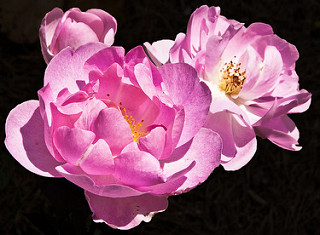

In [88]:
PIL.Image.open(roses[0])

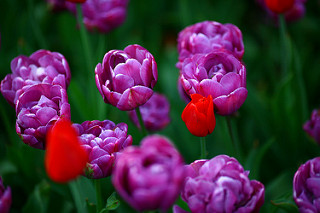

In [89]:
tupils = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tupils[0]))

In [90]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'daisy' : list(data_dir.glob('daisy/*'))
}

In [91]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [92]:
flowers_images_dict['roses'][4]

PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg')

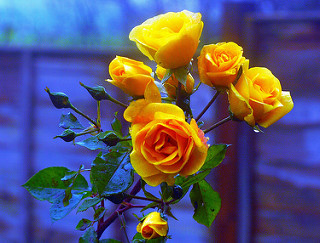

In [93]:
PIL.Image.open(flowers_images_dict['roses'][9])

In [94]:
def showimages(start , stop ):
    for i in range(start,stop):
      image = PIL.Image.open(flowers_images_dict['roses'][i])
      plt.figure(figsize=(2,3))
      plt.imshow(image)
      plt.axis('off')
      plt.show()

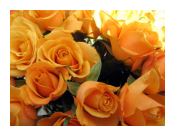

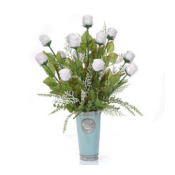

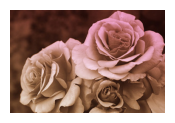

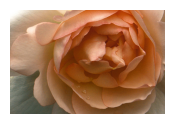

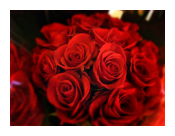

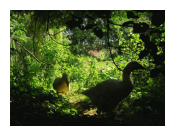

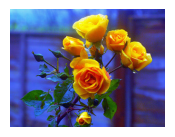

In [95]:
showimages(3,10)

In [96]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg')]

In [97]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'

array([[[ 9, 17, 24],
        [10, 18, 25],
        [11, 19, 26],
        ...,
        [ 1,  4,  8],
        [ 1,  4,  8],
        [ 1,  4,  8]],

       [[ 9, 17, 24],
        [10, 18, 25],
        [11, 19, 26],
        ...,
        [ 3,  6, 10],
        [ 1,  4,  8],
        [ 0,  3,  7]],

       [[ 8, 16, 23],
        [ 9, 17, 24],
        [10, 18, 25],
        ...,
        [ 7, 10, 14],
        [ 4,  7, 11],
        [ 1,  4,  8]],

       ...,

       [[ 0,  2,  3],
        [ 0,  2,  3],
        [ 0,  2,  3],
        ...,
        [ 4,  7, 11],
        [ 6,  9, 13],
        [ 6,  7, 11]],

       [[ 1,  3,  4],
        [ 1,  3,  4],
        [ 1,  3,  4],
        ...,
        [ 3,  6, 10],
        [ 4,  7, 11],
        [ 4,  5,  9]],

       [[ 1,  3,  4],
        [ 2,  4,  5],
        [ 3,  5,  6],
        ...,
        [ 1,  4,  8],
        [ 2,  5,  9],
        [ 1,  2,  6]]], dtype=uint8)
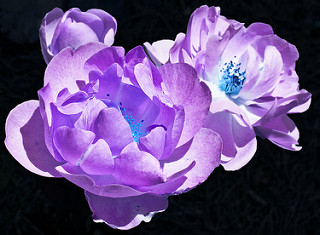

In [98]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [99]:
img.shape

(235, 320, 3)

In [100]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [101]:
X = []
y = []

for flower_name , images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [102]:
X = np.array(X)
y = np.array(y)

In [103]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [104]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [105]:
num_classes = 5

model = Sequential([
    Conv2D(filters = 16 , kernel_size = 3 , padding = 'same' , activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Conv2D(64 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled , y_train , epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.3815 - loss: 1.6073
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6071 - loss: 1.0290
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6714 - loss: 0.8522
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7495 - loss: 0.6812
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8442 - loss: 0.4526
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9160 - loss: 0.2638
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9603 - loss: 0.1477
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9863 - loss: 0.0673
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9840 - loss: 0.0652
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9871 - loss: 0.0487
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9845 - loss: 0.0519
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [106]:
model.evaluate(X_test_scaled , y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6435 - loss: 2.4943


[2.655751943588257, 0.6209150552749634]

In [107]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[ -3.8649805 , -13.008553  ,   2.150386  , -20.605711  ,
         11.387757  ],
       [ 22.850063  ,  -2.0403311 , -28.06262   , -22.017796  ,
          6.882295  ],
       [ -1.2759254 ,  -4.485279  ,  14.658172  , -14.679668  ,
         -6.5798783 ],
       ...,
       [ -1.1275535 ,   3.4993117 ,  -8.227677  ,  -2.1801097 ,
         -5.981234  ],
       [  5.3172607 ,  -4.4953322 ,  -2.593902  ,  -9.959751  ,
          1.8684486 ],
       [ -2.41038   ,  -0.18171853,  -4.0990224 ,   2.6568873 ,
          0.38457763]], dtype=float32)

In [108]:
score = tf.nn.softmax(predictions[0])

In [109]:
np.argmax(score)

4

In [110]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.3756240e-07, 2.5396584e-11, 9.7323617e-05, 1.2745900e-14,
       9.9990249e-01], dtype=float32)>

In [111]:
y_test[0]

4

In [112]:
from tensorflow.keras import layers

In [113]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


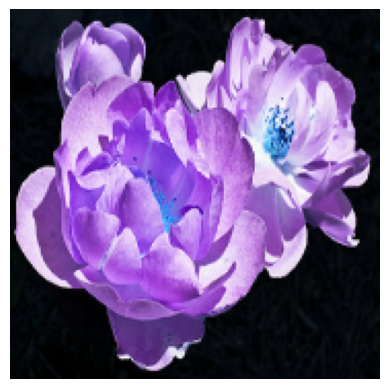

In [114]:
plt.axis('off')
plt.imshow(X[0])

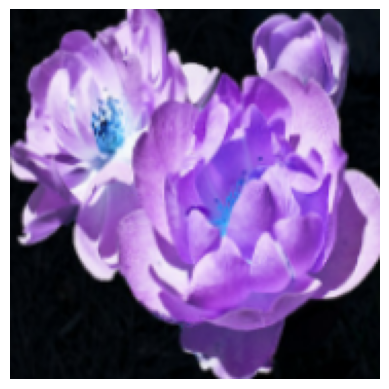

In [115]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [116]:
num_classes = 5

model = Sequential([
    data_augmentation,
    Conv2D(16 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Conv2D(32 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Conv2D(64 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(num_classes)
])
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled , y_train , epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3420 - loss: 1.5992
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5133 - loss: 1.1365
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6158 - loss: 0.9666
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6552 - loss: 0.8914
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6722 - loss: 0.8566
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6804 - loss: 0.8102
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7098 - loss: 0.7602
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7404 - loss: 0.6824
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7141 - loss: 0.7481
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7406 - loss: 0.6741
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7415 - loss: 0.6360
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy:

In [117]:
model.evaluate(X_test_scaled , y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7499 - loss: 0.8716


[0.8365698456764221, 0.7538126111030579]